In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
list(enumerate(pd.read_csv("sisal_2022.csv", skiprows=5).columns))

C:\Users\dacr9\AppData\Local\Temp\ipykernel_16368\3371480129.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  list(enumerate(pd.read_csv("sisal_2022.csv", skiprows=5).columns))


[(0, 'TIMESTAMP'),
 (1, 'Temperatura Promedio'),
 (2, 'Humedad Relativa'),
 (3, 'Velocidad Viento Promedio'),
 (4, 'Velocidad Viento Máxima'),
 (5, 'Dirección Viento Promedio'),
 (6, 'Dirección Viento STD'),
 (7, 'LLuvia Total'),
 (8, 'Presión Promedio'),
 (9, 'Radiación Promedio')]

In [35]:
df = pd.read_csv("sisal_2022.csv", skiprows=8, usecols=[0,1,2,3,5,9],
           names=["Tiempo","Temp","HR","WS","WD","Rad"], index_col=0, parse_dates=True)

In [3]:
df_h = df.resample("H").mean()

In [4]:
diciembre = df_h.loc["2022-12"]

In [6]:
diciembre.describe()

,Temp,HR,WS,WD,Rad
count,744.000000,744.000000,744.000000,744.000000,744.000000
mean,24.318473,80.237320,6.178348,97.995609,184.630341
std,2.355415,9.415251,3.043558,65.609542,265.418539
min,18.033500,45.470667,1.131000,8.633350,-2.096167
25%,22.310667,75.277625,4.020233,50.180000,-0.938908
50%,24.638500,80.948917,5.280933,89.681833,0.446458
75%,25.989708,86.642500,7.539104,126.816250,371.197083
max,31.482167,98.751667,17.306500,348.401667,800.273333


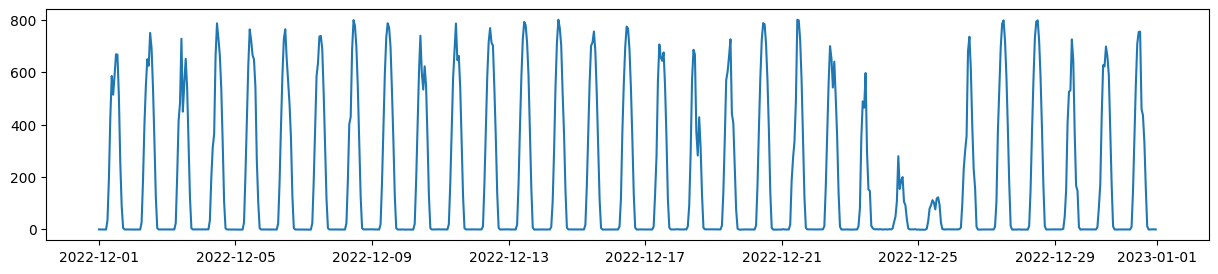

In [29]:
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(diciembre.Rad)

In [9]:
dia = diciembre[diciembre.Rad>0]

In [10]:
dia.describe()

,Temp,HR,WS,WD,Rad
count,378.000000,378.000000,378.000000,378.000000,378.000000
mean,24.998887,77.352618,6.646604,101.242580,364.281848
std,2.534072,9.880973,3.093237,76.774629,270.290404
min,18.033500,45.470667,1.488333,8.633350,0.223183
25%,23.295458,71.906667,4.299354,47.036208,111.309708
50%,25.799333,78.251833,5.926900,77.961000,363.938333
75%,26.361083,83.775000,8.596371,137.951667,618.729167
max,31.482167,98.751667,17.036333,343.378333,800.273333


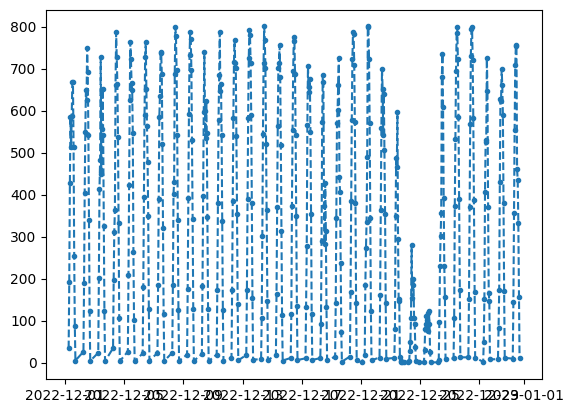

In [15]:
fig, ax = plt.subplots()
ax.plot(dia.Rad,ls="--", marker=".")

In [13]:
dia.head(20)

,Temp,HR,WS,WD,Rad
Tiempo,,,,,
2022-12-01 06:00:00,24.191833,89.720000,3.268133,92.666667,33.853950
2022-12-01 07:00:00,24.655167,87.065000,2.911867,95.202833,190.856667
2022-12-01 08:00:00,26.120167,81.684333,4.487400,78.048833,427.995000
2022-12-01 09:00:00,27.126833,79.103833,6.706433,65.590500,585.483333
2022-12-01 10:00:00,27.139667,80.793000,8.842650,54.241500,514.133333
2022-12-01 11:00:00,27.163500,81.134667,9.623333,51.849667,587.771667
2022-12-01 12:00:00,27.217167,80.682500,10.087333,50.517167,668.466667
2022-12-01 13:00:00,27.313000,79.268833,10.641500,53.463167,667.218333
2022-12-01 14:00:00,27.299167,79.325833,10.886500,55.104667,513.273333


In [16]:
diciembre.between_time("06:00","17:00")

,Temp,HR,WS,WD,Rad
Tiempo,,,,,
2022-12-01 06:00:00,24.191833,89.720000,3.268133,92.666667,33.853950
2022-12-01 07:00:00,24.655167,87.065000,2.911867,95.202833,190.856667
2022-12-01 08:00:00,26.120167,81.684333,4.487400,78.048833,427.995000
2022-12-01 09:00:00,27.126833,79.103833,6.706433,65.590500,585.483333
2022-12-01 10:00:00,27.139667,80.793000,8.842650,54.241500,514.133333
...,...,...,...,...,...
2022-12-31 13:00:00,30.243167,58.081000,5.046717,161.193333,459.831667
2022-12-31 14:00:00,30.040000,61.026000,3.526150,198.470000,435.185000
2022-12-31 15:00:00,25.653667,88.365000,5.328967,342.723333,333.048333


{'whiskers': [<matplotlib.lines.Line2D at 0x291bac83290>,
 'caps': [<matplotlib.lines.Line2D at 0x291bedd0a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x291bed7bed0>],
 'medians': [<matplotlib.lines.Line2D at 0x291bedd1ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x291bedd2250>],
 'means': []}

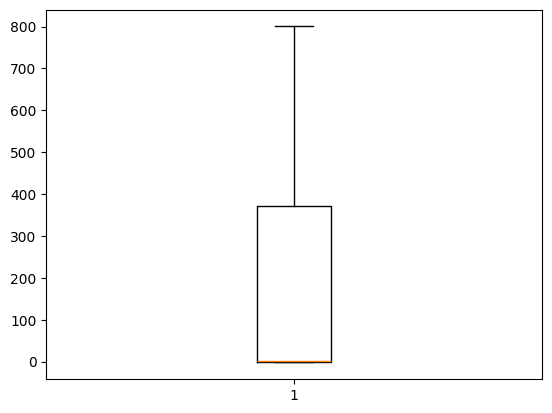

In [30]:
fig, ax = plt.subplots()
ax.boxplot(diciembre.Rad)

In [38]:
q1 = diciembre.WS.quantile(0.25)
q2 = diciembre.WS.quantile(0.50)
q3 = diciembre.WS.quantile(0.75)
IQR = q3-q1

Text(0.6, 12.817410416666668, 'Límite Superior')

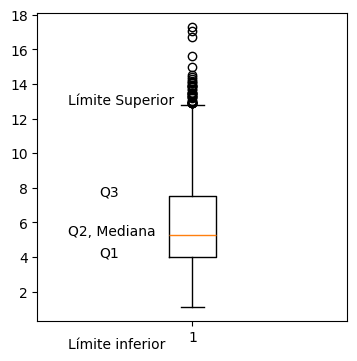

In [60]:
fig, ax = plt.subplots(figsize=(4,4))
ax.boxplot(diciembre.WS)
ax.text(0.7,q1,"Q1")
ax.text(0.6,q2,"Q2, Mediana")
ax.text(0.7,q3,"Q3")
ax.text(0.6, q1-1.5*IQR, "Límite inferior")
ax.text(0.6, q3+1.5*IQR, "Límite Superior")

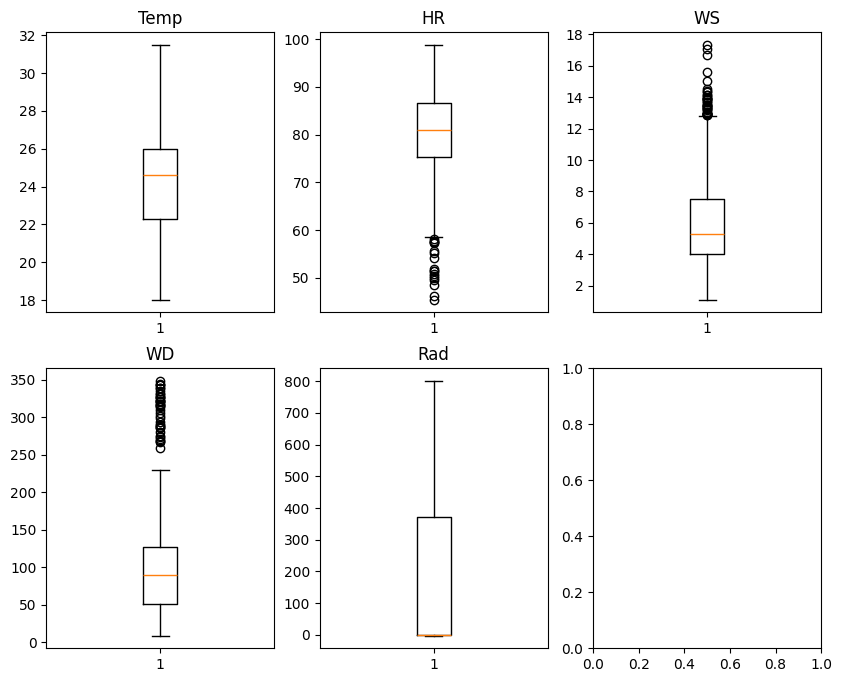

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,8))
ax = ax.flatten()

for i, col in enumerate(diciembre.columns):
    ax[i].boxplot(diciembre[col])
    ax[i].set_title(col)

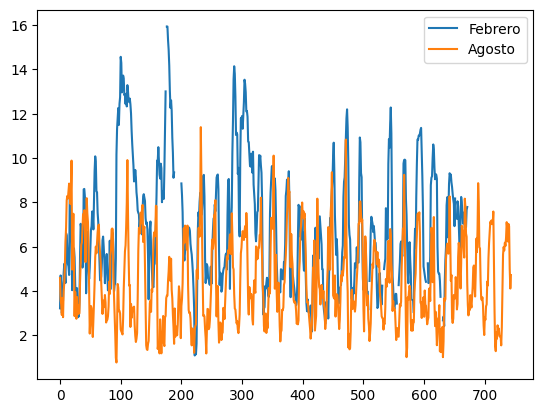

In [70]:
plt.plot(df_h.WS.loc["2022-02"].values, label="Febrero")
plt.plot(df_h.WS.loc["2022-08"].values, label="Agosto")
plt.legend()

In [93]:
df_h.fillna(method="backfill",inplace=True)

C:\Users\dacr9\AppData\Local\Temp\ipykernel_16368\4183075228.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_h.fillna(method="backfill",inplace=True)


In [94]:
df_h["mes"] = df_h.index.month
# df_h

In [95]:
import numpy as np

In [96]:
boxplot_mes = [df_h[df_h["mes"]==i]["WS"] for i in range(1,13)]
boxplot_max = [df_h[df_h["mes"]==i]["WS"].max() for i in range(1,13)]

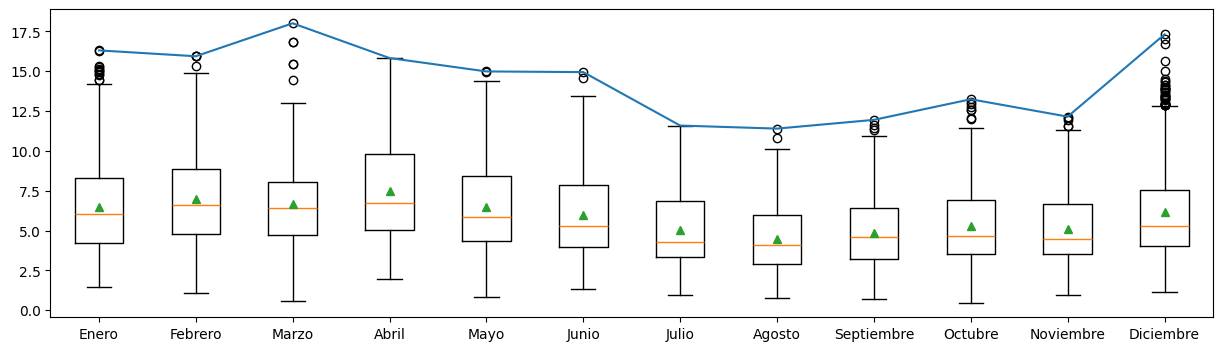

In [97]:
fig, ax = plt.subplots(figsize=(15,4))
ax.boxplot(boxplot_mes, showmeans=True)
ax.set_xticks(np.arange(1,13,1), labels=["Enero", "Febrero", "Marzo", "Abril",
                                        "Mayo", "Junio", "Julio", "Agosto",
                                        "Septiembre", "Octubre", "Noviembre", "Diciembre"]);
ax.plot(np.arange(1,13), boxplot_max)

<Axes: xlabel='Tiempo'>

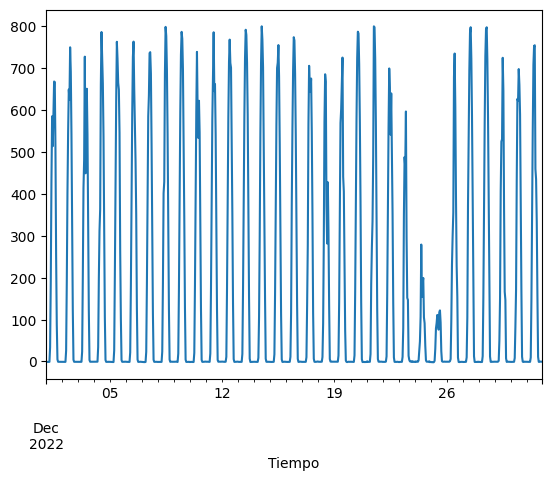

In [99]:
diciembre.Rad.plot()

In [104]:
df_mes = df_h.groupby(by=[df_h.index.month, df_h.index.hour]).mean()

In [110]:
df_mes

Temp         HR        WS          WD       Rad   mes
Tiempo Tiempo                                                            
1      0       21.919032  80.052903  5.739591   94.786903 -0.815587   1.0
       1       21.631468  80.317796  5.692783   94.145213 -0.919392   1.0
       2       21.359559  80.468113  6.079233   98.556456 -0.847016   1.0
       3       21.094043  80.853188  5.776205  101.743995 -0.871435   1.0
       4       20.880210  81.756210  5.626601  101.708694 -0.867258   1.0
...                  ...        ...       ...         ...       ...   ...
12     19      25.218597  78.671672  7.365952   83.280049 -0.927808  12.0
       20      24.976656  79.377720  6.843899   71.172822 -0.841107  12.0
       21      24.571667  79.849790  6.257482   78.258130 -0.734245  12.0
       22      24.035403  81.333935  5.851389   91.052270 -0.704539  12.0
       23      23.481043  83.133968  5.497505   97.243216 -0.828849  12.0

[288 rows x 6 columns]

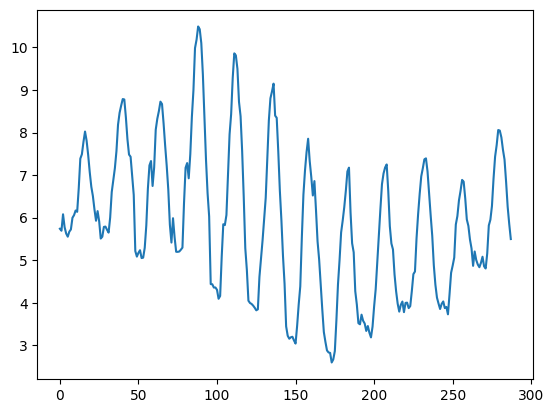

In [113]:
plt.plot(df_mes.WS.values)